# Chi Square Test ,  Test of Independence

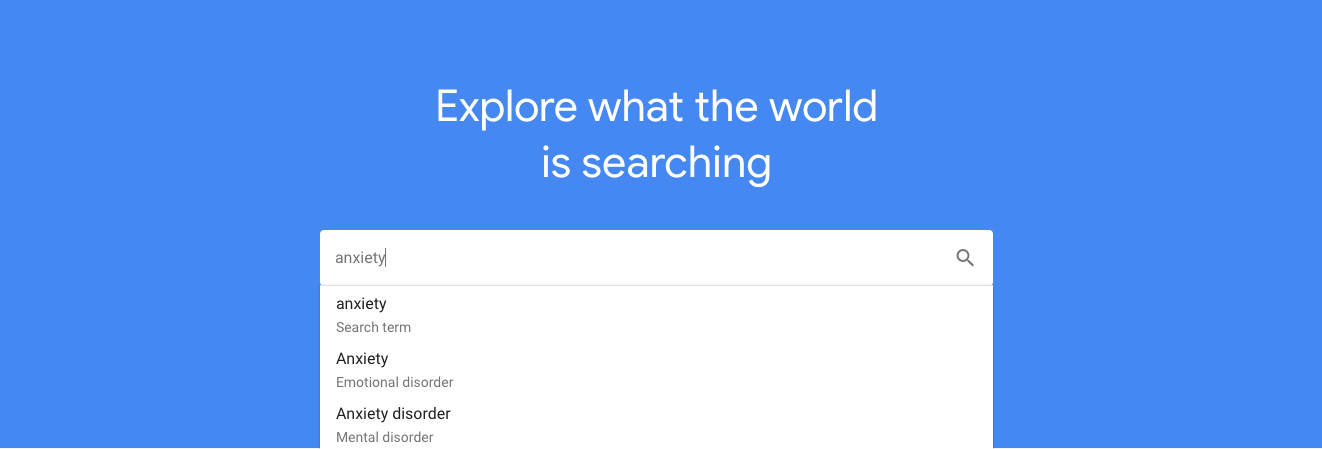

<h2>Test of search words  Categories Worldwide vs Cananda vs USA

In [62]:
#https://www.kaggle.com/hamelg/python-for-data-analysis-index   
# for learning the process see the stats test in this list

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

# Equation Chi Square  <br>
O = Observed values E = Expected

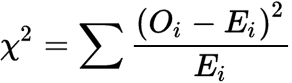

In [65]:
import sympy

In [66]:
from sympy import Sum, factorial, oo, IndexedBase, Function

In [69]:
from sympy import *
chi,O,E,i = symbols('chi O E i')
# O= Observed E = Expected 

In [70]:
sympy.Sum((Indexed(O,i) - Indexed(E,i))**2 /Indexed(E,i),(i,1,i) )

Sum((-E[i] + O[i])**2/E[i], (i, 1, i))

In [ ]:
# how to calculate Expected is below in the

In [8]:
from scipy.stats import norm

In [9]:
world = pd.read_excel('search_term_worldwide.xlsx')

In [10]:
canada = pd.read_excel('search_term_canada.xlsx')

In [11]:
us=pd.read_excel('search_term_us.xlsx')

In [12]:
canada= canada.drop(columns=['Week'])

In [13]:
world= world.drop(columns=['Week'])

In [14]:
us= us.drop(columns=['Week'])

In [15]:
canada.columns

Index(['depression', 'anxiety', 'obsessive compulsive disorder', 'ocd',
       'insomnia', 'panic attack', 'mental health', 'counseling',
       'psychiatrist'],
      dtype='object')

In [16]:
w= pd.DataFrame(world.sum())

In [17]:
c= pd.DataFrame(canada.sum())

In [18]:
w

,0
depression,4494
anxiety,4754
obsessive compulsive disorder,3837
ocd,3515
insomnia,4179
panic attack,4088
mental health,2559
counseling,4227
psychiatrist,4286


In [19]:
us= pd.DataFrame(us.sum())

In [20]:
observed_search = c

In [21]:
c.sum()

0    33720
dtype: int64

In [22]:
w.sum()

0    35939
dtype: int64

In [23]:
#Calculate Expected in world wide

In [24]:
pop_ratios = w/len(w.sum())

In [25]:
expected  = pop_ratios*len(c.sum())

In [26]:
expected_us= pop_ratios*len(us.sum())

In [27]:
expected

,0
depression,4494.0
anxiety,4754.0
obsessive compulsive disorder,3837.0
ocd,3515.0
insomnia,4179.0
panic attack,4088.0
mental health,2559.0
counseling,4227.0
psychiatrist,4286.0


In [28]:
c

,0
depression,4150
anxiety,4326
obsessive compulsive disorder,2774
ocd,4023
insomnia,4040
panic attack,3957
mental health,3009
counseling,3734
psychiatrist,3707


In [29]:
expected_us

,0
depression,4494.0
anxiety,4754.0
obsessive compulsive disorder,3837.0
ocd,3515.0
insomnia,4179.0
panic attack,4088.0
mental health,2559.0
counseling,4227.0
psychiatrist,4286.0


In [30]:
observed=c

In [31]:
chi_squared_stat = (((observed-expected)**2)/expected).sum()

In [32]:
chi_squared_stat

0    656.445941
dtype: float64

In [33]:
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=observed.shape[0]-1)

In [34]:
p_value

array([0.])

In [35]:
# This suggests there is significant difference in world and canada mental health

In [38]:
chi_squared_stat_us = (((us-expected_us)**2)/expected_us).sum()

In [39]:
chi_squared_stat_us

0    977.772378
dtype: float64

In [40]:
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat_us, df=us.shape[0]-1)

In [41]:
p_value 

array([0.])

<h2> Compute it by the Stats Test and they prove our Mathematical Calculations are correct

In [43]:
stats.chisquare(f_obs= observed, f_exp= expected)

Power_divergenceResult(statistic=array([656.44594072]), pvalue=array([1.69397236e-136]))

In [44]:
stats.chisquare(f_obs= us, f_exp= expected_us)

Power_divergenceResult(statistic=array([977.77237831]), pvalue=array([9.36624569e-206]))

In [1024]:
s,p=stats.chisquare(f_obs= us, f_exp= expected_us)

In [1025]:
int(p)

0

In [1076]:
w.index

Index(['depression', 'anxiety', 'obsessive compulsive disorder', 'ocd',
       'insomnia', 'panic attack', 'mental health', 'counseling',
       'psychiatrist'],
      dtype='object')

In [1073]:
list(w[0])

[4494, 4754, 3837, 3515, 4179, 4088, 2559, 4227, 4286]

<AxesSubplot:ylabel='0'>

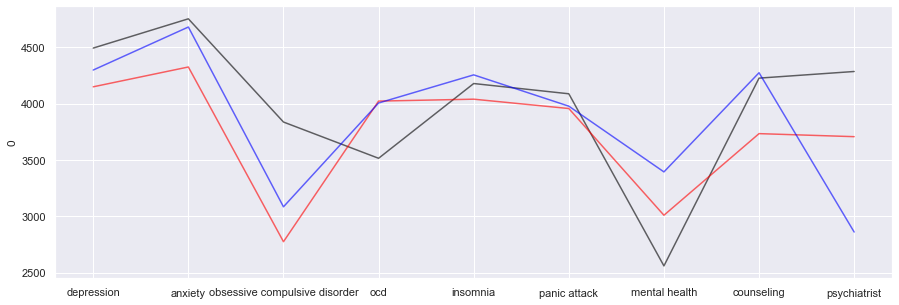

In [1091]:
plt.figure(figsize=(15,5))
sns.lineplot(data=w, x=w.index, y=w[0],color='black' ,alpha=0.6)
sns.lineplot(data=c, x=c.index, y=c[0],color='red',alpha=0.6)
sns.lineplot(data=us, x=us.index, y=us[0],color='blue',alpha=0.6)

In [966]:
c

,0
depression,4150
anxiety,4326
obsessive compulsive disorder,2774
ocd,4023
insomnia,4040
panic attack,3957
mental health,3009
counseling,3734
psychiatrist,3707


<AxesSubplot:ylabel='0'>

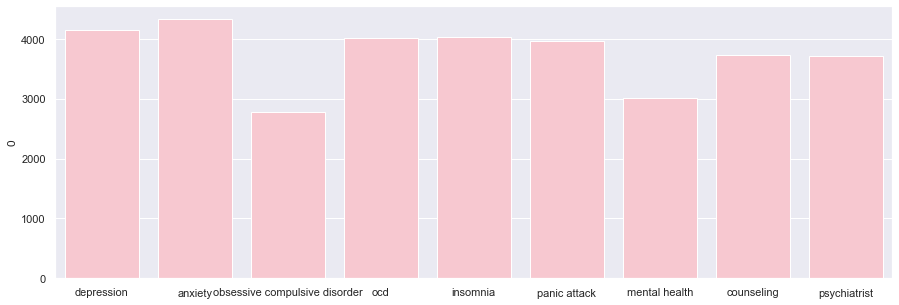

In [1007]:
plt.figure(figsize=(15,5))
sns.barplot(x=c.index,y=0,data=c,color='pink')

<h3> How Chi Square is calculated another basic example using numpy data

In [47]:
 # Reference #https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests

In [48]:
cat_pop =pd.DataFrame(['cat1']*1000 +['cat2']*200+['cat3']*50+['others']*70000)

In [49]:
cat_sample =pd.DataFrame(['cat1']*20 +['cat2']*50+['cat3']*100+['others']*1000)

In [50]:
ct_pop = pd.crosstab(index=cat_pop[0], columns="count")
ct_pop

col_0,count
0,
cat1,1000
cat2,200
cat3,50
others,70000


In [51]:
ct_sam =pd.crosstab(index=cat_sample[0], columns="count")
ct_sam

col_0,count
0,
cat1,20
cat2,50
cat3,100
others,1000


Chi-squared tests are based on the so-called chi-squared statistic. You calculate the chi-squared statistic with the following formula:

sum((observed−expected)2expected)

In [52]:
# CHI TEST  = sum ( observed - expected)**2 / expeced

In [53]:
observed = ct_sam  # this is the sample counts using crosstabs
observed 

col_0,count
0,
cat1,20
cat2,50
cat3,100
others,1000


In [54]:
# to calculate expected = pop_ratios *len(cat_sample)
# pop ratio  = ct_pop/len(cat_pop)


In [723]:
pop_ratios = ct_pop/len(cat_pop)
pop_ratios

col_0,count
0,
cat1,0.014035
cat2,0.002807
cat3,0.000702
others,0.982456


In [55]:
expected  = pop_ratios*len(cat_sample)

In [56]:
ct_sam 

col_0,count
0,
cat1,20
cat2,50
cat3,100
others,1000


In [725]:
expected

col_0,count
0,
cat1,16.421053
cat2,3.284211
cat3,0.821053
others,1149.473684


In [732]:
#or do the calculations together
expected  = (ct_pop/len(cat_pop))*len(cat_sample)
c

col_0,count
0,
cat1,16.421053
cat2,3.284211
cat3,0.821053
others,1149.473684


In [736]:
chi_squared_stat = (((observed-expected)**2)/expected).sum()

In [737]:
chi_squared_stat

col_0
count    12665.027473
dtype: float64

In [739]:
observed.shape[0]-1

3

In [740]:
df= observed.shape[0]-1

In [741]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = df) 

In [742]:
crit

7.814727903251179

In [745]:
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=df)

In [751]:
p_value

array([0.])

In [752]:
# since its less than 0.05 the sample is very different from pop and null H is rejected

In [754]:
# DO THE CALCULATIONS USING STATS 

In [753]:
stats.chisquare(f_obs= observed, f_exp= expected)

Power_divergenceResult(statistic=array([12665.02747253]), pvalue=array([0.]))

In [ ]:
# chi_squared_stat  == statistic=array([12665.02747253])

In [798]:
# for T test we used this but its different in chi sq 
#stats.t.ppf(q=0.095, df= df)

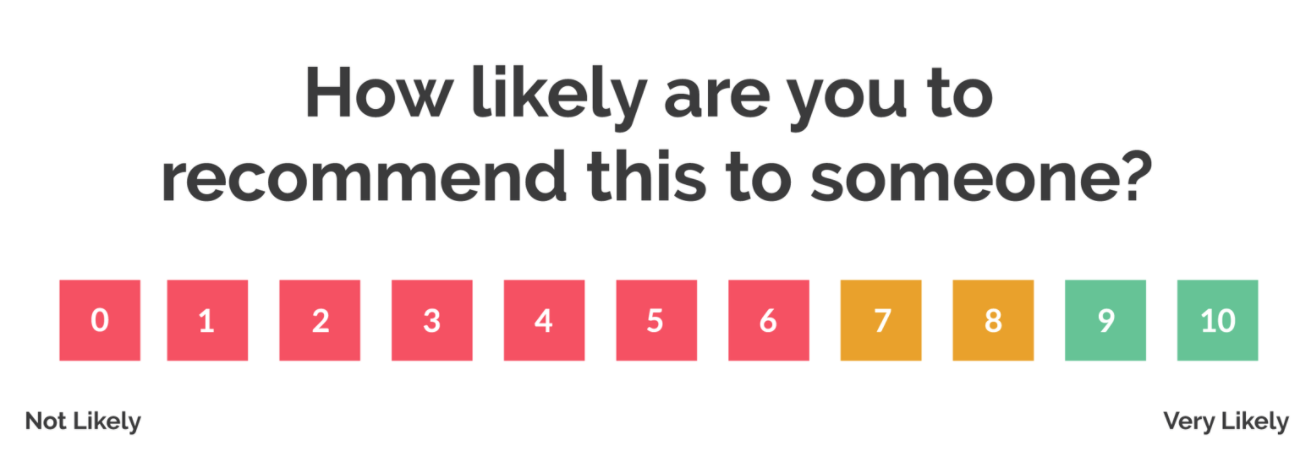

<br><br><br>
<h2> NPS SCORE SURVEY DATA

In [57]:
nps = pd.read_excel('NPS_Data.xlsx')

In [1049]:
nps.head(10)

,Response Date,Unique ID,Survey Type,Country,Unit,Industry,Business Unit,Project ID,Source Type,LTR Services,...,Innovation,Partnership,Proactivity,Quality,Responsiveness,Staffing,Technical Expertise,Timeliness,Value,Reminded
0,2020-07-11 19:55:35.000000,UIDRS5770.26768582561,Type2,JP,Company976,Chemical,Gateway,PRUIDRS5770.2676858256119,Telephonic,2,...,7,8,5,8,9,9,8,8,8.0,No
1,2020-07-11 19:42:00.000000,UIDRS8653.02010100842,Type2,EC,Company351,Financial,Web,PRUIDRS8653.0201010084219,Mail,8,...,7,8,10,8,8,9,8,8,8.0,No
2,2020-07-11 19:30:02.000000,UIDRS1750.37697196659,Type1,MY,Company1091,Professional Services,Engagement,PRUIDRS1750.3769719665919,Mail,8,...,7,8,8,8,8,8,9,7,8.0,No
3,2020-07-11 19:29:45.000000,UIDRS8073.87319671492,Type2,SG,Company1957,Consumer Products,Business Solutions,PRUIDRS8073.8731967149219,Online,9,...,7,8,9,8,9,9,8,8,8.0,No
4,2020-07-11 19:12:34.000000,UIDRS8764.90387836464,Type2,US,Company3414,Consumer Products,Business Solutions,PRUIDRS8764.9038783646419,Online,10,...,7,8,9,8,9,9,8,8,10.0,No
5,2020-07-11 18:53:04.000000,UIDRS3692.98309812877,Type2,US,Company2648,Professional Services,Business Solutions,PRUIDRS3692.9830981287718,Online,8,...,7,8,8,8,6,9,8,8,8.0,No
6,2020-07-11 18:13:25.000000,UIDRS4024.10445705516,Type1,JP,Company2893,Financial,Business Solutions,PRUIDRS4024.1044570551618,Online,7,...,7,8,8,6,8,6,7,7,7.0,No
7,2020-07-11 17:47:40.000001,UIDRS4413.91325831455,Type2,MY,Company2714,Professional Services,Business Solutions,PRUIDRS4413.9132583145517,Online,8,...,7,8,9,8,9,9,8,8,8.0,No
8,2020-07-11 17:45:26.000000,UIDRS4043.77454213789,Type2,JP,Company1197,Consumer Products,Technology Solutions,PRUIDRS4043.7745421378917,Telephonic,9,...,7,8,9,8,10,9,8,8,10.0,No
9,2020-07-11 17:15:20.000000,UIDRS4554.61880046049,Type1,MY,Company2464,Chemical,Business Solutions,PRUIDRS4554.6188004604917,Online,10,...,7,8,8,10,8,10,10,10,10.0,No


In [1163]:
nps.columns

Index(['Response Date', 'Unique ID', 'Survey Type', 'Country', 'Unit',
       'Industry', 'Business Unit', 'Project ID', 'Source Type',
       'LTR Services', 'LTC Services', 'Overall Satisfaction', 'Communication',
       'Expertise', 'Industry Expertise', 'Innovation', 'Partnership',
       'Proactivity', 'Quality', 'Responsiveness', 'Staffing',
       'Technical Expertise', 'Timeliness', 'Value', 'Reminded'],
      dtype='object')

In [1183]:
nps_scores =nps[['Unit','Overall Satisfaction', 'Communication',
       'Expertise', 'Industry Expertise', 'Innovation', 'Partnership',
       'Proactivity', 'Quality', 'Responsiveness', 'Staffing',
       'Technical Expertise', 'Timeliness', 'Value']]

In [1184]:
nps_scores

,Unit,Overall Satisfaction,Communication,Expertise,Industry Expertise,Innovation,Partnership,Proactivity,Quality,Responsiveness,Staffing,Technical Expertise,Timeliness,Value
0,Company976,2.0,8,9,8,7,8,5,8,9,9,8,8,8.0
1,Company351,8.0,8,8,8,7,8,10,8,8,9,8,8,8.0
2,Company1091,8.0,8,8,8,7,8,8,8,8,8,9,7,8.0
3,Company1957,9.0,8,10,8,7,8,9,8,9,9,8,8,8.0
4,Company3414,10.0,9,10,8,7,8,9,8,9,9,8,8,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29695,Company2468,8.0,8,8,10,7,8,8,9,8,10,9,9,8.0
29696,Company2207,10.0,10,10,8,7,8,10,8,10,9,8,8,10.0
29697,Company536,8.0,8,8,9,7,8,8,9,8,9,9,9,8.0
29698,Company516,9.0,8,8,10,9,10,8,8,10,9,8,8,10.0


In [1185]:
nps_scores = nps_scores.groupby('Unit').sum().reset_index()

In [1186]:
nps_scores.head()

,Unit,Overall Satisfaction,Communication,Expertise,Industry Expertise,Innovation,Partnership,Proactivity,Quality,Responsiveness,Staffing,Technical Expertise,Timeliness,Value
0,Company1,5.0,8,8,8,7,8,8,8,8,9,8,8,0.0
1,Company10,54.0,50,49,53,43,49,50,52,50,54,53,52,45.0
2,Company100,10.0,8,8,10,7,8,8,9,8,9,10,10,10.0
3,Company1000,23.0,24,24,21,21,24,24,23,24,25,24,22,21.0
4,Company1001,9.0,8,8,9,7,8,8,9,8,9,9,7,8.0


In [1199]:
overall  = pd.DataFrame( nps_scores.sum())[1:]
overall.columns=['score']
overall

,score
Overall Satisfaction,248152.5
Communication,239665
Expertise,240901
Industry Expertise,245573
Innovation,209221
Partnership,238561
Proactivity,234563
Quality,245640
Responsiveness,242053
Staffing,261295


In [1192]:
#Company2207 NPS

In [1198]:
specific_nps= nps_scores.loc[nps_scores['Unit']=='Company2207'].T[1:]
specific_nps.columns=['score']
specific_nps

,score
Overall Satisfaction,60.0
Communication,62
Expertise,64
Industry Expertise,55
Innovation,48
Partnership,58
Proactivity,63
Quality,56
Responsiveness,62
Staffing,63


In [1200]:
#calculate Expected

In [1207]:
29700

29700

In [1208]:
#1
pop_ratios = overall/29700
pop_ratios

,score
Overall Satisfaction,8.355303
Communication,8.069529
Expertise,8.111145
Industry Expertise,8.268451
Innovation,7.044478
Partnership,8.032357
Proactivity,7.897744
Quality,8.270707
Responsiveness,8.149933
Staffing,8.797811


In [ ]:
#2

In [1217]:
nps.loc[nps['Unit']=='Company2207'].count()[0]

7

In [ ]:
# expected = pop_ratios*len(cat_sample)

In [1218]:
expected = pop_ratios*7

In [1219]:
expected 

,score
Overall Satisfaction,58.487121
Communication,56.4867
Expertise,56.778013
Industry Expertise,57.879158
Innovation,49.311347
Partnership,56.226498
Proactivity,55.284209
Quality,57.894949
Responsiveness,57.049529
Staffing,61.58468


In [1221]:
observed_nps= specific_nps

In [1222]:
observed_nps

,score
Overall Satisfaction,60.0
Communication,62
Expertise,64
Industry Expertise,55
Innovation,48
Partnership,58
Proactivity,63
Quality,56
Responsiveness,62
Staffing,63


In [1225]:
#4 chi_squared_stat calculation

In [1223]:
chi_squared_stat = (((observed_nps-expected)**2)/expected).sum()

In [1224]:
chi_squared_stat

score    3.507103
dtype: object

In [1226]:
#5

In [1227]:
df= observed_nps.shape[0]-1

In [1231]:
df

12

In [1228]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = df) 

In [1229]:
crit

21.02606981748307

In [1120]:
#6

In [1232]:
p_value = 1 - stats.chi2.cdf(x=3.507103, df=12)

In [1233]:
p_value

0.9907817448884974

In [1235]:
# according to this Company2207 scores are almost same as overall scores

In [1236]:
#calculate same using stats

In [ ]:
stats.chisquare(f_obs= specific_nps, f_exp= expected)

In [1248]:
#Example two can compare response by Business Unit

In [1058]:
nps['Business Unit'].value_counts()

Business Solutions      15422
Technology Solutions    10496
Gateway                  1749
Machines                  731
Web                       576
Public                    325
Scrutiny                  174
IoT                       135
Engagement                 92
Name: Business Unit, dtype: int64

In [1093]:
nps['Business Unit'].loc[nps['Country']=='US'].value_counts()

Business Solutions      2867
Technology Solutions    1797
Gateway                  380
Machines                 305
Public                   271
Web                      172
Engagement                59
Scrutiny                  49
IoT                       31
Name: Business Unit, dtype: int64

In [1105]:
expected_response= pd.DataFrame(nps['Business Unit'].value_counts())

In [1106]:
expected_response

,Business Unit
Business Solutions,15422
Technology Solutions,10496
Gateway,1749
Machines,731
Web,576
Public,325
Scrutiny,174
IoT,135
Engagement,92


In [1101]:
us_response= pd.DataFrame(nps['Business Unit'].loc[nps['Country']=='US'].value_counts())

In [1102]:
us_response

,Business Unit
Business Solutions,2867
Technology Solutions,1797
Gateway,380
Machines,305
Public,271
Web,172
Engagement,59
Scrutiny,49
IoT,31


In [1108]:
#1

In [1110]:
pop_ratios = expected_response/expected_response.sum()
pop_ratios

,Business Unit
Business Solutions,0.519259
Technology Solutions,0.353401
Gateway,0.058889
Machines,0.024613
Web,0.019394
Public,0.010943
Scrutiny,0.005859
IoT,0.004545
Engagement,0.003098


In [1148]:
expected_response/29700

,Business Unit
Business Solutions,0.519259
Technology Solutions,0.353401
Gateway,0.058889
Machines,0.024613
Web,0.019394
Public,0.010943
Scrutiny,0.005859
IoT,0.004545
Engagement,0.003098


In [1109]:
#2

In [1136]:
expected_response.sum()

Business Unit    29700
dtype: int64

In [1147]:
nps.loc[nps['Country']=='US'].count()[0]

5931

In [1135]:
us_response.sum()

Business Unit    5931
dtype: int64

In [1137]:
expected  = pop_ratios*us_response.sum()

In [1149]:
(expected_response/29700) *5931

,Business Unit
Business Solutions,3079.726667
Technology Solutions,2096.019394
Gateway,349.270000
Machines,145.978485
Web,115.025455
Public,64.901515
Scrutiny,34.747273
IoT,26.959091
Engagement,18.372121


In [1138]:
expected 

,Business Unit
Business Solutions,3079.726667
Technology Solutions,2096.019394
Gateway,349.270000
Machines,145.978485
Web,115.025455
Public,64.901515
Scrutiny,34.747273
IoT,26.959091
Engagement,18.372121


In [1113]:
#3

In [1139]:
observed = us_response
observed

,Business Unit
Business Solutions,2867
Technology Solutions,1797
Gateway,380
Machines,305
Public,271
Web,172
Engagement,59
Scrutiny,49
IoT,31


In [1154]:
(((observed-expected)**2)/expected)

,Business Unit
Business Solutions,14.693718
Engagement,89.843982
Gateway,2.703733
IoT,0.605694
Machines,173.229927
Public,654.477563
Scrutiny,5.846221
Technology Solutions,42.658288
Web,28.220700


In [1140]:
chi_squared_stat = (((observed-expected)**2)/expected).sum()5

In [1159]:
chi_squared_stat

Business Unit    1012.279825
dtype: float64

In [1118]:
#5

In [1119]:
df= observed.shape[0]-1

In [1121]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = df) 

In [1122]:
crit

15.50731305586545

In [1120]:
#6

In [1123]:
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=df)

In [1124]:
p_value

array([0.])

In [1125]:
#There is significant difference in us response and expected response

In [1126]:
# lets verify our manual results usings Stats

In [1127]:
#Final Step using Stats

In [1155]:
s,p =stats.chisquare(f_obs= observed, f_exp= expected)

In [1157]:
stats.chisquare(f_obs= observed, f_exp= expected)

Power_divergenceResult(statistic=array([665.14520605]), pvalue=array([2.27502031e-138]))

In [1160]:
s,p

(array([665.14520605]), array([2.27502031e-138]))

In [1156]:
int(s),int(p)

(665, 0)

In [1249]:
#other places where we can do analysis

In [1060]:
nps['Source Type'].value_counts()

Online        17981
Telephonic     9663
Mail           2056
Name: Source Type, dtype: int64

In [1059]:
nps['Country'].value_counts()

US    5931
GB    3120
JP    2529
DE    1964
AU    1627
      ... 
IQ       1
BD       1
ET       1
LI       1
RS       1
Name: Country, Length: 104, dtype: int64

<h2> other databases you could apply this in

In [1050]:
food_preference =pd.read_csv('Food_Preference.csv')

In [1054]:
food_preference

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe
...,...,...,...,...,...,...,...,...
283,2019/05/10 9:24:00 AM GMT+8,FPS284,Male,Indian,27,Western Food,Fresh Juice,Yes
284,2019/05/10 9:32:54 AM GMT+8,FPS285,Male,Indian,24,Traditional food,Fresh Juice,Yes
285,2019/05/10 12:09:17 PM GMT+8,FPS286,Male,Indian,25,Traditional food,Fresh Juice,Yes
286,2019/05/10 12:52:17 PM GMT+8,FPS287,Male,Indian,27,Traditional food,Fresh Juice,Yes


In [1055]:
food_preference.Food.value_counts()

Traditional food    238
Western Food         50
Name: Food, dtype: int64

In [1056]:
food_code=pd.read_csv('food_coded.csv')

In [1057]:
food_code

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


<h1> NPS CHI Sq of Independence

In [1255]:
nps_ind=nps[['Source Type','Industry']]

In [1258]:
nps_ind.columns=['Source','Industry']
nps_ind

,Source,Industry
0,Telephonic,Chemical
1,Mail,Financial
2,Mail,Professional Services
3,Online,Consumer Products
4,Online,Consumer Products
...,...,...
29695,Online,Financial
29696,Online,Chemical
29697,Online,Financial
29698,Online,Chemical


In [1265]:
source =pd.crosstab(nps_ind.Source,nps_ind.Industry , margins=True)


In [1266]:
source

Industry,Aerospace,Automobile,Chemical,Communication,Computer Services,Consumer Products,Education,Energy,Entertainment,Financial,Government,Healthcare,Life Sciences,Professional Services,Transportation,All
Source,,,,,,,,,,,,,,,,
Mail,15,53,26,65,162,315,33,63,23,636,158,341,54,53,59,2056
Online,214,825,987,1186,224,3682,54,1315,341,4861,1276,398,596,767,1255,17981
Telephonic,91,339,339,260,503,2316,254,195,166,3275,183,190,174,764,614,9663
All,320,1217,1352,1511,889,6313,341,1573,530,8772,1617,929,824,1584,1928,29700


In [1270]:
source.columns=['Chemical',
 'Financial',
 'Professional Services',
 'Consumer Products',
 'Transportation',
 'Education',
 'Entertainment',
 'Healthcare',
 'Automobile',
 'Energy',
 'Government',
 'Communication',
 'Life Sciences',
 'Computer Services',
 'Aerospace','row_totals']

In [1271]:
source.index=['Mail','Online','Telephonic','col_totals']

In [1272]:
source

,Chemical,Financial,Professional Services,Consumer Products,Transportation,Education,Entertainment,Healthcare,Automobile,Energy,Government,Communication,Life Sciences,Computer Services,Aerospace,row_totals
Mail,15,53,26,65,162,315,33,63,23,636,158,341,54,53,59,2056
Online,214,825,987,1186,224,3682,54,1315,341,4861,1276,398,596,767,1255,17981
Telephonic,91,339,339,260,503,2316,254,195,166,3275,183,190,174,764,614,9663
col_totals,320,1217,1352,1511,889,6313,341,1573,530,8772,1617,929,824,1584,1928,29700


In [1274]:
s =source.shape

In [1278]:
s ,s[1]-1, s[0]-1

((4, 16), 15, 3)

In [1284]:
# make observed table without the totals

In [1282]:
observed = source.iloc[0:s[0]-1,0:s[1]-1]

In [1283]:
observed

,Chemical,Financial,Professional Services,Consumer Products,Transportation,Education,Entertainment,Healthcare,Automobile,Energy,Government,Communication,Life Sciences,Computer Services,Aerospace
Mail,15,53,26,65,162,315,33,63,23,636,158,341,54,53,59
Online,214,825,987,1186,224,3682,54,1315,341,4861,1276,398,596,767,1255
Telephonic,91,339,339,260,503,2316,254,195,166,3275,183,190,174,764,614


In [1285]:
#make expected table 

In [1309]:
len(nps)

29700

In [1300]:
expected =  np.outer(source["row_totals"][0:s[0]-1],source.loc["col_totals"][0:s[1]-1]) / len(nps)

In [1301]:
expected=pd.DataFrame(expected)
expected

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,22.152189,84.247542,93.592997,104.599865,61.541549,437.021145,23.605926,108.891852,36.689562,607.246869,111.937778,64.310572,57.041886,109.653333,133.466936
1,193.734680,736.797205,818.529024,914.790943,538.219158,3822.021987,206.448519,952.327037,320.873064,5310.751919,978.965556,562.435993,498.866801,958.986667,1167.251448
2,104.113131,395.955253,439.877980,491.609192,289.239293,2053.956869,110.945556,511.781111,172.437374,2854.001212,526.096667,302.253434,268.091313,515.360000,627.281616


In [1302]:
expected.columns=['Chemical',
 'Financial',
 'Professional Services',
 'Consumer Products',
 'Transportation',
 'Education',
 'Entertainment',
 'Healthcare',
 'Automobile',
 'Energy',
 'Government',
 'Communication',
 'Life Sciences',
 'Computer Services',
 'Aerospace',]

expected.index=['Mail','Online','Telephonic',]

In [1303]:
expected

,Chemical,Financial,Professional Services,Consumer Products,Transportation,Education,Entertainment,Healthcare,Automobile,Energy,Government,Communication,Life Sciences,Computer Services,Aerospace
Mail,22.152189,84.247542,93.592997,104.599865,61.541549,437.021145,23.605926,108.891852,36.689562,607.246869,111.937778,64.310572,57.041886,109.653333,133.466936
Online,193.734680,736.797205,818.529024,914.790943,538.219158,3822.021987,206.448519,952.327037,320.873064,5310.751919,978.965556,562.435993,498.866801,958.986667,1167.251448
Telephonic,104.113131,395.955253,439.877980,491.609192,289.239293,2053.956869,110.945556,511.781111,172.437374,2854.001212,526.096667,302.253434,268.091313,515.360000,627.281616


In [1304]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

3589.2804251627704


In [1305]:
observed.shape

(3, 15)

In [1306]:
df =observed.shape[1]-1   #columns + rows

df

14

In [1307]:
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,df=df)

p_value

0.0

In [1310]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = df)   # *

print("Critical value")
print(crit)

Critical value
23.684791304840576


In [1311]:
stat,p,value,expected = stats.chi2_contingency(observed= observed)

In [1315]:
stat,p,value,

(3589.28042516277, 0.0, 28)

In [1313]:
 
pd.DataFrame(expected)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,22.152189,84.247542,93.592997,104.599865,61.541549,437.021145,23.605926,108.891852,36.689562,607.246869,111.937778,64.310572,57.041886,109.653333,133.466936
1,193.734680,736.797205,818.529024,914.790943,538.219158,3822.021987,206.448519,952.327037,320.873064,5310.751919,978.965556,562.435993,498.866801,958.986667,1167.251448
2,104.113131,395.955253,439.877980,491.609192,289.239293,2053.956869,110.945556,511.781111,172.437374,2854.001212,526.096667,302.253434,268.091313,515.360000,627.281616


In [1308]:
stats.chi2_contingency(observed= observed)

(3589.28042516277,
 0.0,
 28,
 array([[  22.15218855,   84.24754209,   93.59299663,  104.59986532,
           61.54154882,  437.02114478,   23.60592593,  108.89185185,
           36.68956229,  607.24686869,  111.93777778,   64.31057239,
           57.04188552,  109.65333333,  133.46693603],
        [ 193.73468013,  736.79720539,  818.52902357,  914.79094276,
          538.21915825, 3822.02198653,  206.44851852,  952.32703704,
          320.87306397, 5310.75191919,  978.96555556,  562.43599327,
          498.86680135,  958.98666667, 1167.25144781],
        [ 104.11313131,  395.95525253,  439.8779798 ,  491.60919192,
          289.23929293, 2053.95686869,  110.94555556,  511.78111111,
          172.43737374, 2854.00121212,  526.09666667,  302.25343434,
          268.09131313,  515.36      ,  627.28161616]]))

<br><br>
<h1>Chi Square Test of Independence - how its done using numpy sample set? 

In [800]:
#https://www.jmp.com/en_ch/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html

In [801]:
# https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests

In [802]:
food_order = np.random.choice(a= ["vanilla","chocolate","coconut","other","almond"],
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

In [804]:
pop_cat = np.random.choice(a= ["male","female","trans"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)

In [805]:
orders = pd.DataFrame({"food":food_order, 
                       "sex":pop_cat})

In [1162]:
orders.head(10)

,food,sex
0,coconut,male
1,chocolate,female
2,almond,trans
3,vanilla,trans
4,vanilla,trans
5,almond,trans
6,almond,male
7,almond,trans
8,almond,male
9,coconut,trans


In [814]:
food = pd.crosstab(orders.food,orders.sex , margins=True)
food

sex,female,male,trans,All
food,,,,
almond,97,202,186,485
chocolate,38,53,56,147
coconut,54,95,97,246
other,10,23,30,63
vanilla,8,23,28,59
All,207,396,397,1000


In [816]:
food.columns= ['female','male','trans','row_totals']

In [817]:
food.index= ["vanilla","chocolate","coconut","other","almond" ,'col_totals']

In [818]:
food

,female,male,trans,row_totals
vanilla,97,202,186,485
chocolate,38,53,56,147
coconut,54,95,97,246
other,10,23,30,63
almond,8,23,28,59
col_totals,207,396,397,1000


In [819]:
food.shape

(6, 4)

In [876]:
observed = food.iloc[0:5,0:3]

In [821]:
observed

,female,male,trans
vanilla,97,202,186
chocolate,38,53,56
coconut,54,95,97
other,10,23,30
almond,8,23,28


In [822]:
expected =  np.outer(food["row_totals"][0:5],food.loc["col_totals"][0:3]) / 1000


In [824]:
expected= pd.DataFrame(expected)

In [825]:
expected

,0,1,2
0,100.395,192.060,192.545
1,30.429,58.212,58.359
2,50.922,97.416,97.662
3,13.041,24.948,25.011
4,12.213,23.364,23.423


In [826]:
expected.columns= ['female','male','trans',]

expected.index= ["vanilla","chocolate","coconut","other","almond" ]

In [827]:
expected

,female,male,trans
vanilla,100.395,192.060,192.545
chocolate,30.429,58.212,58.359
coconut,50.922,97.416,97.662
other,13.041,24.948,25.011
almond,12.213,23.364,23.423


In [828]:
observed

,female,male,trans
vanilla,97,202,186
chocolate,38,53,56
coconut,54,95,97
other,10,23,30
almond,8,23,28


In [829]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

7.757683325801682


In [830]:
observed.shape[0]+observed.shape[1]

8

In [831]:
df =observed.shape[0]+observed.shape[1]    #columns + rows

In [832]:
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)

In [833]:
p_value

0.4574912930140931

In [834]:
#there is no dependance between the sex and food ordered ... we used the random sampling

In [835]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 8)   # *

print("Critical value")
print(crit)

Critical value
15.50731305586545


In [836]:
# to do it automatically

In [877]:
s,p,df,expected =stats.chi2_contingency(observed= observed)

In [843]:
df

8

In [878]:
s

7.757683325801683

In [841]:
p

0.45749129301409286

In [844]:
expected

array([[100.395, 192.06 , 192.545],
       [ 30.429,  58.212,  58.359],
       [ 50.922,  97.416,  97.662],
       [ 13.041,  24.948,  25.011],
       [ 12.213,  23.364,  23.423]])

In [ ]:
# statistic value should be same as critical value to ensure that thate is no difference

In [874]:
15.50731305586545

15.50731305586545

In [879]:
s

7.757683325801683

In [58]:
#references to read
#https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests
#https://www.kaggle.com/hamelg/python-for-data-26-anova/notebook